In [1]:
import torch
from diffusers import ControlNetModel, StableDiffusionControlNetImg2ImgPipeline

controlnet = ControlNetModel.from_pretrained("lllyasviel/control_v11f1e_sd15_tile", torch_dtype=torch.float16)
pipeline = StableDiffusionControlNetImg2ImgPipeline.from_pretrained(
	"runwayml/stable-diffusion-v1-5", controlnet=controlnet,
    torch_dtype=torch.float16
)
pipeline.to("cuda")

/home/mlfavorfit/anaconda3/envs/diffusion_rnd/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00,  9.94it/s]


StableDiffusionControlNetImg2ImgPipeline {
  "_class_name": "StableDiffusionControlNetImg2ImgPipeline",
  "_diffusers_version": "0.27.0.dev0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "controlnet": [
    "diffusers",
    "ControlNetModel"
  ],
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

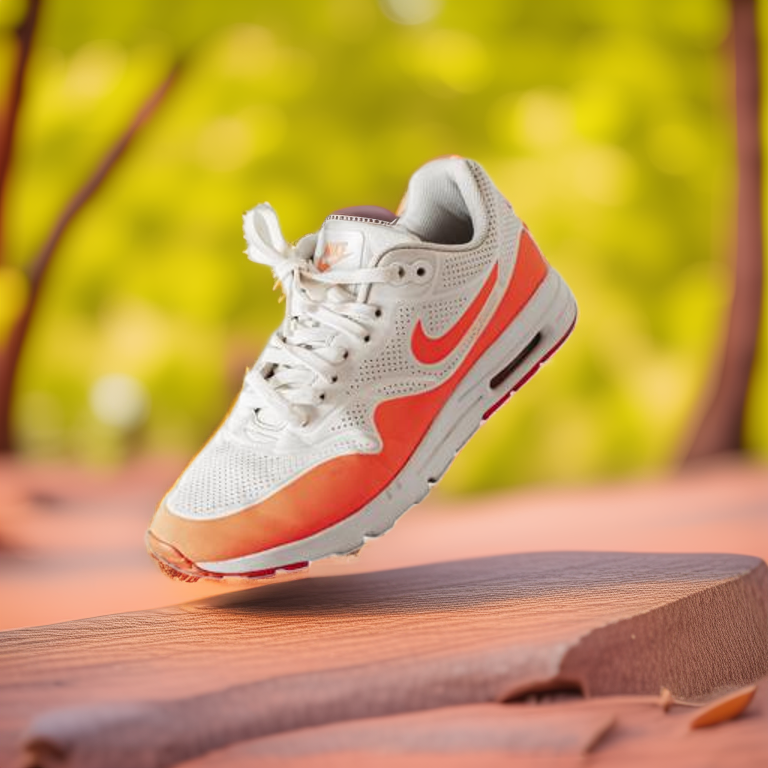

In [23]:
from PIL import Image

# img = Image.open("./image/dog_bad_sr.png")
img = Image.open("./image/shoe2.png")
img

100%|██████████| 12/12 [00:02<00:00,  4.50it/s]


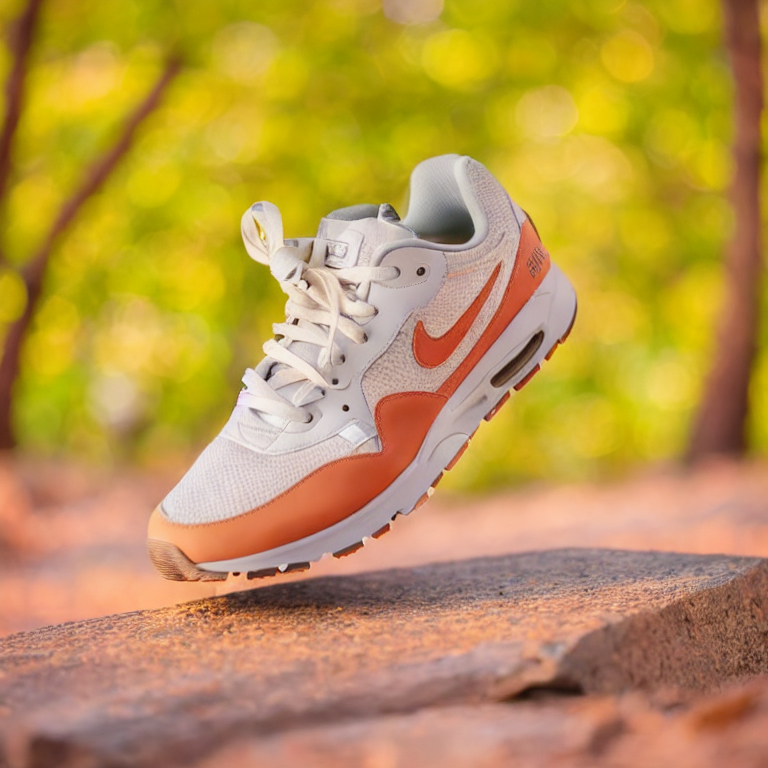

In [24]:
output_image = pipeline(prompt="a shoe, outdoors, product photo, professional photography", 
             negative_prompt="blur, lowres, bad anatomy, bad hands, cropped, worst quality", 
             image=img, 
             control_image=img,
             strength=0.6,
             generator=torch.manual_seed(42),
             num_inference_steps=20,
            ).images[0]
output_image

In [21]:
from PIL import Image
from PIL.ImageOps import invert
image = Image.open("/media/mlfavorfit/sdb/contolnet_dataset/control_net_train_outpaint/images/nike_1511_white.jpg").convert("RGB")
mask = Image.open("/media/mlfavorfit/sdb/contolnet_dataset/control_net_train_outpaint/masks/nike_1511_white.jpg").convert("L")
object_image = Image.open("/media/mlfavorfit/sdb/contolnet_dataset/control_net_train_outpaint/conditioning_images/nike_1511_white.jpg").convert("RGB")

# image = Image.open("/media/mlfavorfit/sda/product_512/image/nike_1326_apair.jpg")
# mask = Image.open("/media/mlfavorfit/sda/product_512/mask/nike_1326_apair.jpg")
# object_image = Image.open("/media/mlfavorfit/sdb/contolnet_dataset/control_net_train_outpaint/conditioning_images/nike_1326_apair.jpg").convert("RGB")

inverted_mask = invert(mask)

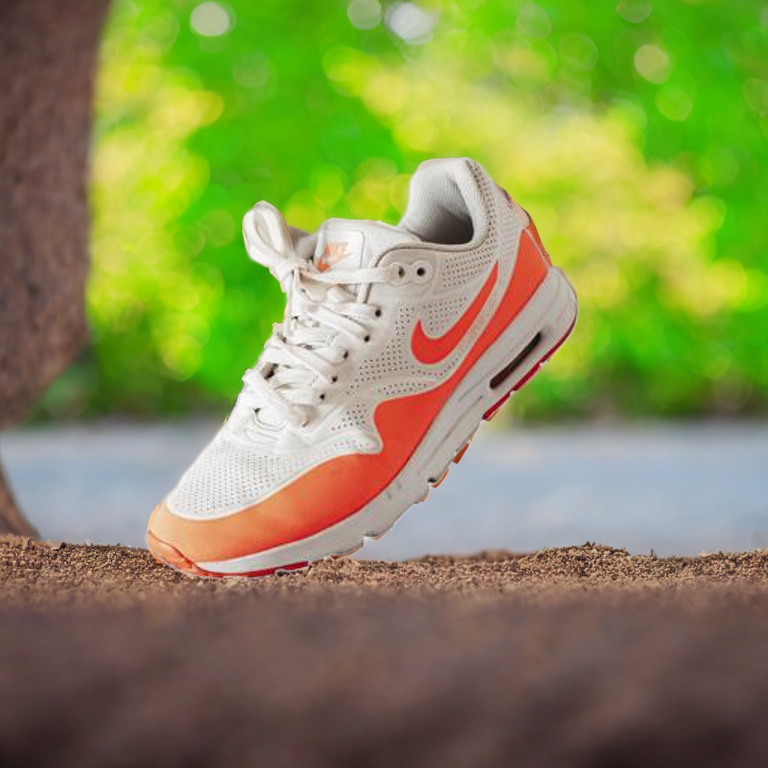

In [22]:

from utils import make_outpaint_condition, composing_output
composing_output(output_image, image.resize([768,768]), mask.resize([768,768]).convert("RGB"))